# Analysis of the data structures
Anirudh Lath, u1149016

## Imports

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

## Prepare Data

In [17]:
df = pd.read_csv("data.csv")

In [18]:
# N = 10000 dim = 2 k = 64
k_df = df[(df["N"] == 10000) & (df["dim"] == 2)]
N_df = df[(df["k"] == 64) & (df["dim"] == 2)]
dim_df = df[(df["N"] == 10000) & (df["k"] == 64)]

## Plot Graphs

struct
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

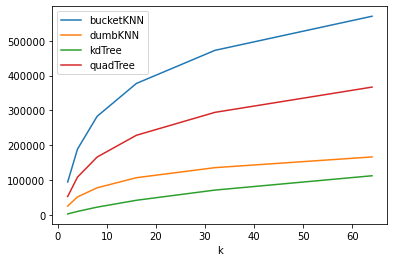

In [19]:
k_df.set_index("k").groupby("struct")["time"].plot(legend=True)

Looks like KDtree is performing better than all the other structures when k varies. Second fastest is dumbKNN, then quadtree and lastly bucketKNN.

struct
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

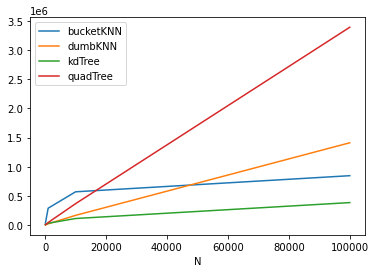

In [20]:
N_df.set_index("N").groupby("struct")["time"].plot(legend=True)

Looks like KDtree is the exceptionally faster than the other data structures when N varies. Quad tree seems to be the slowest one in this analysis.

struct
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

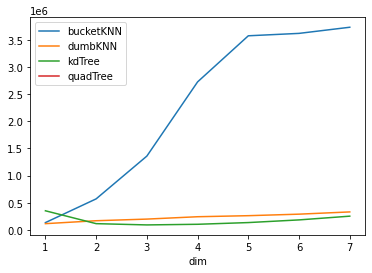

In [21]:
dim_df.set_index("dim").groupby("struct")["time"].plot(legend=True)

Looks like dumbKNN and bucketKNN start off the fastest, but then right at 2 dimensions, the kdTree supersedes them in performance. As the dim sizes increase, kdTree seems to be the fastest one but at the end, it looks like it might intersect dumbKNN and may be slower than dumbKNN.

## Regression

In [31]:
x = df.drop(["struct", "time"], axis=1)
y = df.time
model = LinearRegression().fit(x,y)
print(model.coef_, model.score(x,y))

[2.11217420e+04 3.39322128e+01 4.04056888e+05] 0.17481936963238787


It can be seen that the coefficient of D is the largest and that the change of a point in D gives the greatest predictor of changes in run time. Each additional point in dimension increases the execution time to about 404056 microseconds. Each increase of k points increases execution time by 21121 microseconds. Every 1 point increase in N increases execution time by 33 microseconds.

Meaning that as k increases, the running time will increase logarithmically. We  visited the nodes during our reprojection through the tree that would have  the neighbors we needed. Therefore, the penalty for checking additional nodes will be very small.

 It also makes sense that  KD trees perform better when there are more dimensions, since we can partition the data more efficiently across more dimensions.

I think everything works as expected so I don't see anything unusual.